In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [26]:
#df = pd.read_csv('IQRSanitizedcopy.csv')
df = pd.read_csv('IQRSanitizedcopy.csv', error_bad_lines=False)

/var/folders/nb/s8fktsw52p56v1_88xgvdtsm0000gq/T/ipykernel_13791/901240804.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('IQRSanitizedcopy.csv', error_bad_lines=False)
b'Skipping line 18023: expected 19 fields, saw 20\nSkipping line 18024: expected 19 fields, saw 20\nSkipping line 18025: expected 19 fields, saw 20\nSkipping line 18026: expected 19 fields, saw 20\nSkipping line 18027: expected 19 fields, saw 20\nSkipping line 18028: expected 19 fields, saw 20\nSkipping line 18029: expected 19 fields, saw 20\nSkipping line 18030: expected 19 fields, saw 20\nSkipping line 18031: expected 19 fields, saw 20\nSkipping line 18032: expected 19 fields, saw 20\nSkipping line 18033: expected 19 fields, saw 20\nSkipping line 18034: expected 19 fields, saw 20\nSkipping line 18035: expected 19 fields, saw 20\nSkipping line 18036: expected 19 fields, saw 20\nSkipping line 18037: expec

In [16]:
df

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Turbo,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,NaN,186005,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,Jeep,No,Petrol,3.0,NaN,192000,6,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,NaN,200000,4,Variator,Front,4-5,Right-hand drive,Black,2
3,45769185,3607,862,FORD,ESCAPE,2011,Jeep,Yes,Hybrid,2.5,NaN,168966,4,Automatic,Front-Rear,4-5,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,NaN,91901,4,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18016,45798306,18346,629,HYUNDAI,ELANTRA,2015,Sedan,Yes,LPG,1.6,NaN,31891,4,Automatic,Front,4-5,Left wheel,Grey,4
18017,45774661,6429,0,MERCEDES-BENZ,C 200,2000,Universal,No,CNG,2.0,NaN,240000,4,Manual,Rear,4-5,Left wheel,Blue,4
18018,45810267,27190,640,CHEVROLET,MALIBU,2013,Sedan,Yes,Petrol,2.0,NaN,119150,4,Automatic,Front,4-5,Left wheel,White,4
18019,45763032,941,1750,TOYOTA,HIGHLANDER,2008,Jeep,Yes,Hybrid,3.3,NaN,226094,6,Automatic,Front-Rear,4-5,Left wheel,White,12


In [20]:
df_prices = df.groupby("Color").agg([np.mean, np.std])
df_prices.head()

/var/folders/nb/s8fktsw52p56v1_88xgvdtsm0000gq/T/ipykernel_13791/2370503817.py:1: FutureWarning: ['Manufacturer', 'Model', 'Category', 'Leather_interior', 'Fuel_type', 'Turbo', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_prices = df.groupby("Color").agg([np.mean, np.std])


ID                       Price                \
                       mean           std          mean           std   
Color                                                                   
Beige          4.542404e+07  1.277508e+06  14170.634921  10021.343772   
Black          4.558439e+07  9.270440e+05  14071.769114  12276.123281   
Blue           4.555291e+07  1.046923e+06  12634.979592  11223.561807   
Brown          4.550734e+07  7.693328e+05  14864.230769  12131.633582   
Carnelian red  4.545625e+07  9.794738e+05  14507.436782   8873.668927   

                     Levy                Prod_year           Engine_volume  \
                     mean         std         mean       std          mean   
Color                                                                        
Beige          264.857143  477.820447  2006.714286  8.178858      2.150794   
Black          691.200261  608.981420  2011.085143  5.054958      2.526151   
Blue           516.838246  524.128272  2009.132275  6.799698      2.105140   
Brown          564.094675  497.081353  2011.343195  5.914115      2.229586   
Carnelian red  366.620690  447.552180  2008.793103  6.904196      2.039080   

                              Mileage               Cylinders            \
                    std          mean           std      mean       std   
Color                                                                     
Beige          0.777971  6.305577e+06  6.927810e+07  4.523810  1.143428   
Black          0.957805  2.371663e+06  6.419770e+07  4.845135  1.341736   
Blue           0.721312  3.428241e+06  8.347245e+07  4.420257  1.061760   
Brown          0.880720  1.658504e+05  5.940980e+05  4.568047  1.089636   
Carnelian red  0.621644  5.882736e+06  7.579955e+07  4.281609  0.994787   

                Airbags            
                   mean       std  
Color                              
Beige          5.626984  3.987449  
Black          7.188097  4.581772  
Blue           6.312925  4.356681  
Brown          7.029586  4.435283  
Carnelian red  7.316092  3.970713

In [21]:
prices = df_prices['Price']
print(prices)

                       mean           std
Color                                    
Beige          14170.634921  10021.343772
Black          14071.769114  12276.123281
Blue           12634.979592  11223.561807
Brown          14864.230769  12131.633582
Carnelian red  14507.436782   8873.668927
Golden         13542.371429   8005.584294
Green           9071.831746   8489.828501
Grey           15422.141808  12216.438280
Orange         11574.259109   5501.425024
Pink            8967.560000   6887.070604
Purple          8837.384615   7309.131789
Red            12236.444984  10412.190437
Silver         13798.225102  10009.674687
Sky blue       13768.588235   8519.917377
White          14687.744080  11817.533942
Yellow         16154.175258   8649.207496


<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Color'>

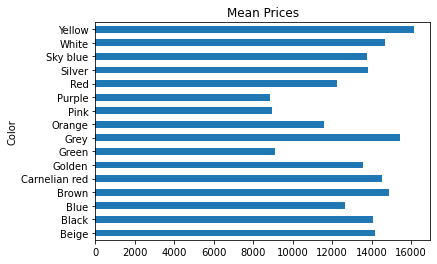

In [24]:
prices.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices")